**Columns:\
Age: Age in years\
KM: Accumulated Kilometers on odometer\
FuelType: Fuel Type (Petrol, Diesel, CNG)\
HP: Horse Power\
MetColor: Metallic Color? (Yes=1, No=0)\
Automatic: Automatic ( (Yes=1, No=0)\
CC: Cylinder Volume in cubic centimeters\
Doors: Number of doors\
Weight: Weight in Kilograms\
Price: Offer Price in EUROs**

# Import necessary libraries

In [54]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

# Import and Inspect dataset

In [2]:
path = 'https://raw.githubusercontent.com/BaoLeQuang178/Toyota-Corolla-Analysis/main/ToyotaCorolla.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [4]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 1436 rows and 10 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


**There are no null values in this dataset.**

# Descriptive statistics with Numerial features 

In [6]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


# Descriptive statistics with Categorical features 

In [7]:
df.describe(include=['O'])

,FuelType
count,1436
unique,3
top,Petrol
freq,1264


**There are 3 types of Fuel. The most common Fuel type is Petrol.**

# Correlation matrix

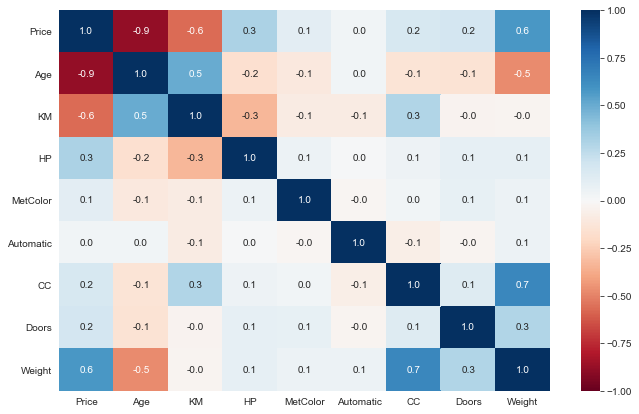

In [8]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot = True, fmt = ".1f", cmap = 'RdBu',
            center = 0, vmin = -1, vmax = 1, ax = ax) #center = 0 to transform to -1 to 1scale
plt.show()

# Box plots discover distributions of Target among different types of Categorical features

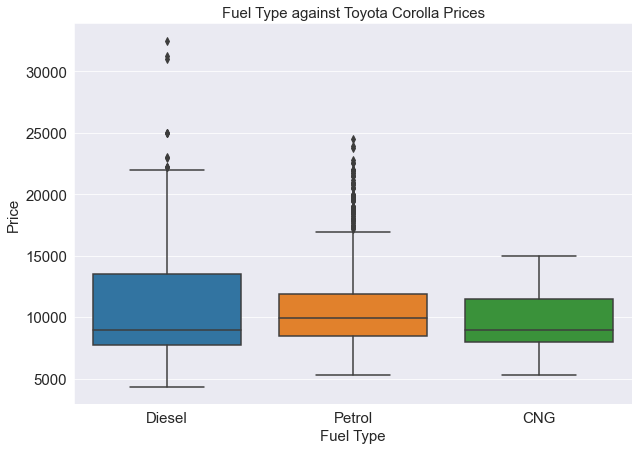

In [9]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['FuelType'], y=df['Price'])
ax.set(xlabel='Fuel Type', ylabel='Price', 
       title="Fuel Type against Toyota Corolla Prices")

ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(15)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

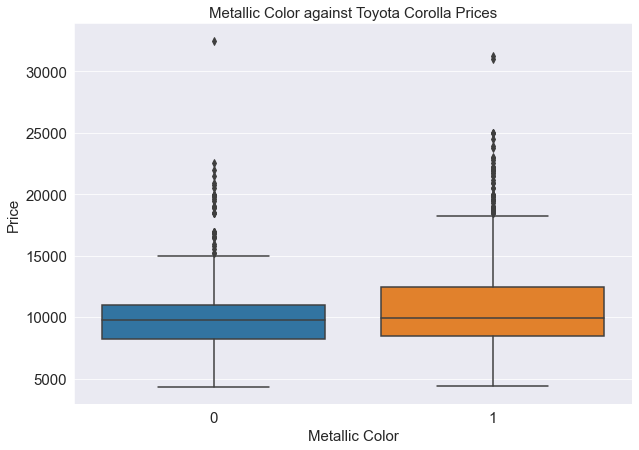

In [10]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['MetColor'], y=df['Price'])
ax.set(xlabel='Metallic Color', ylabel='Price', 
       title="Metallic Color against Toyota Corolla Prices")

ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(15)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

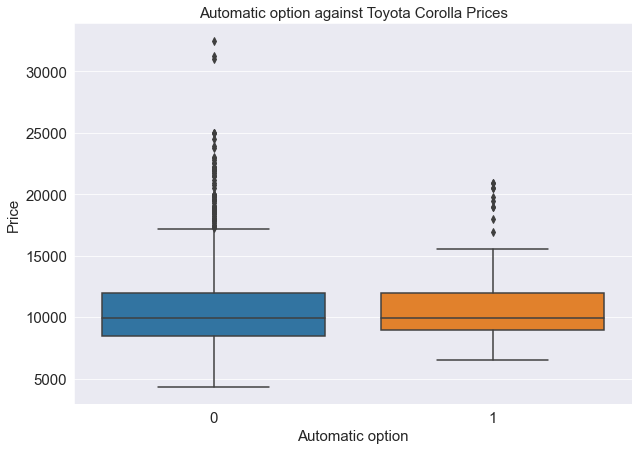

In [11]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['Automatic'], y=df['Price'])
ax.set(xlabel='Automatic option', ylabel='Price', 
       title="Automatic option against Toyota Corolla Prices")

ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(15)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

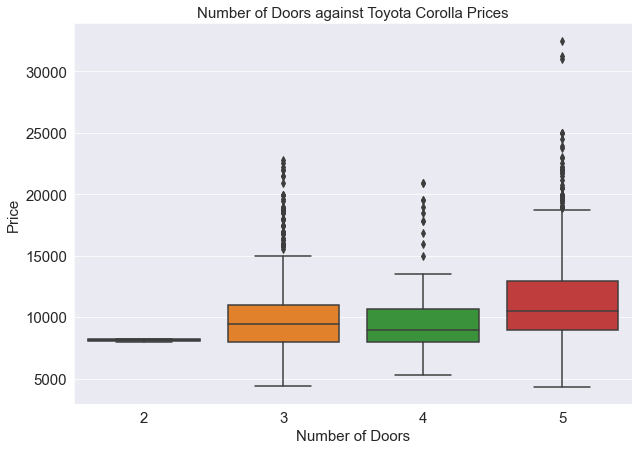

In [12]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['Doors'], y=df['Price'])
ax.set(xlabel='Number of Doors', ylabel='Price', 
       title="Number of Doors against Toyota Corolla Prices")

ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ax.title.set_size(15)

ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

# Joint plot to discover relationship between Numerical features and Target 

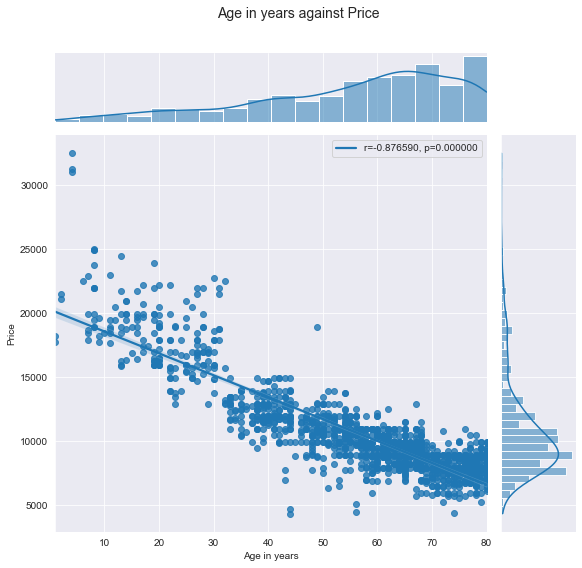

In [13]:
ax = sns.jointplot(x = df['Age'], y=df['Price'], kind="reg", height=8)
r, p = stats.pearsonr(df['Age'], df['Price'])
ax.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax.ax_joint.set_xlabel('Age in years')
ax.ax_joint.set_ylabel('Price')
ax.fig.suptitle("Age in years against Price", fontsize=14)
ax.fig.subplots_adjust(top=0.90) 
plt.show()

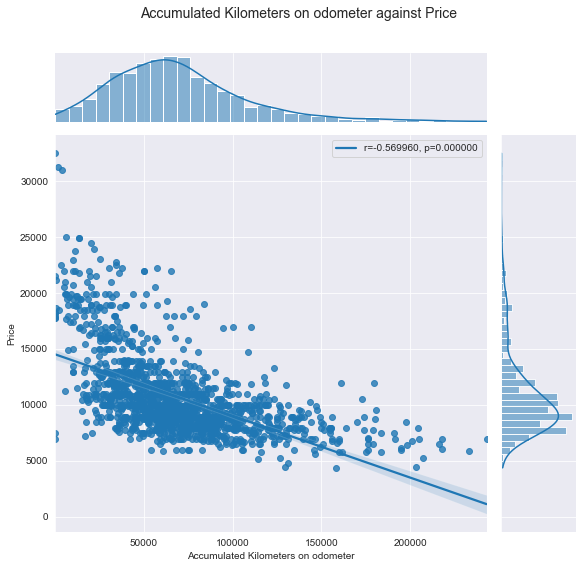

In [14]:
ax = sns.jointplot(x = df['KM'], y=df['Price'], kind="reg", height=8)
r, p = stats.pearsonr(df['KM'], df['Price'])
ax.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax.ax_joint.set_xlabel('Accumulated Kilometers on odometer')
ax.ax_joint.set_ylabel('Price')
ax.fig.suptitle("Accumulated Kilometers on odometer against Price", fontsize=14)
ax.fig.subplots_adjust(top=0.90) 
plt.show()

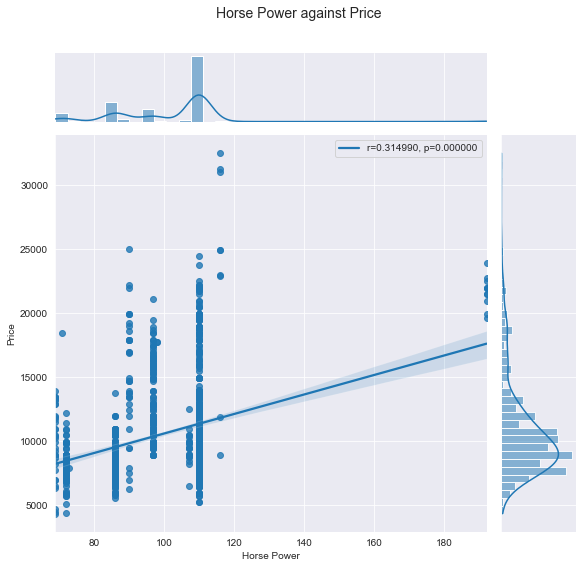

In [15]:
ax = sns.jointplot(x = df['HP'], y=df['Price'], kind="reg", height=8)
r, p = stats.pearsonr(df['HP'], df['Price'])
ax.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax.ax_joint.set_xlabel('Horse Power')
ax.ax_joint.set_ylabel('Price')
ax.fig.suptitle("Horse Power against Price", fontsize=14)
ax.fig.subplots_adjust(top=0.90) 
plt.show()

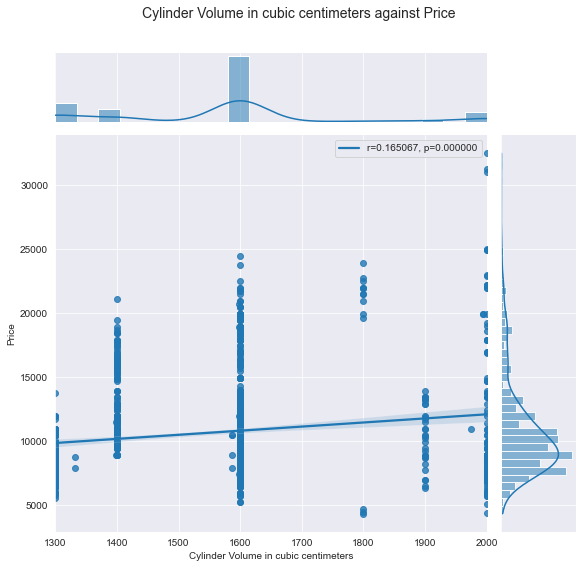

In [16]:
ax = sns.jointplot(x = df['CC'], y=df['Price'], kind="reg", height=8)
r, p = stats.pearsonr(df['CC'], df['Price'])
ax.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax.ax_joint.set_xlabel('Cylinder Volume in cubic centimeters')
ax.ax_joint.set_ylabel('Price')
ax.fig.suptitle("Cylinder Volume in cubic centimeters against Price", fontsize=14)
ax.fig.subplots_adjust(top=0.90) 
plt.show()

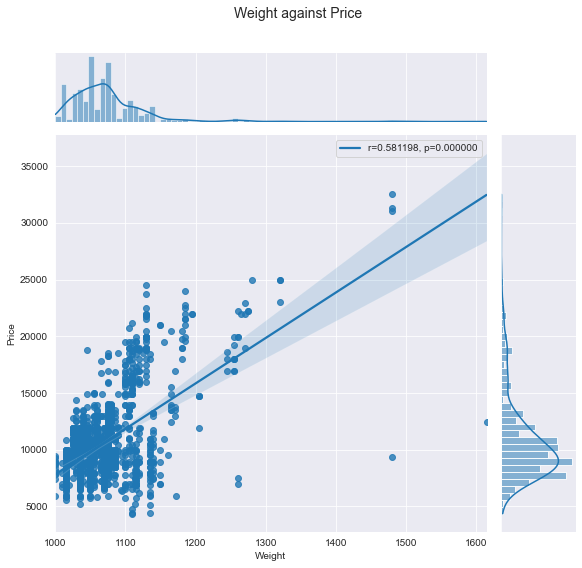

In [17]:
ax = sns.jointplot(x = df['Weight'], y=df['Price'], kind="reg", height=8)
r, p = stats.pearsonr(df['Weight'], df['Price'])
ax.ax_joint.legend(['r={:f}, p={:f}'.format(r,p)])
ax.ax_joint.set_xlabel('Weight')
ax.ax_joint.set_ylabel('Price')
ax.fig.suptitle("Weight against Price", fontsize=14)
ax.fig.subplots_adjust(top=0.90) 
plt.show()

In [18]:
X = df.drop(['Price'], axis=1) #dropping the dependent variable
Y = df[['Price']]

In [19]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X)

In [20]:
X.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,23,46986,90,1,0,2000,3,1165,0,1,0
1,23,72937,90,1,0,2000,3,1165,0,1,0
2,24,41711,90,1,0,2000,3,1165,0,1,0
3,26,48000,90,0,0,2000,3,1165,0,1,0
4,30,38500,90,0,0,2000,3,1170,0,1,0


In [21]:
# Split dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=29)

In [22]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1005, 11)
Shape of X_test:  (431, 11)
Shape of y_train:  (1005, 1)
Shape of y_test (431, 1)


# Statistics model: 
# Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8585065128308245
R2_score (train):  0.8693549119696129
R2_score (test):  0.8671104766473127
RMSE:  1239.5345031102236


# Polynomial Regression - 2nd degree 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [26]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.8585065128308245
R2_score (train):  0.9205607056588531
R2_score (test):  0.8976011308695292
RMSE:  1088.080002118304


**The linear model has been improved with Polynomial Regression compared to Simple Linear Regression with first degree**

# Machine Learning model

# Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.823229257800507
R2_score (train):  1.0
R2_score (test):  0.843477097675059
RMSE:  1345.2475022193419


# Hyper parameter tuning Decision Tree Regressor

In [38]:
parameters={"splitter":["best"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["sqrt", None]}

In [39]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(regressor_dt,param_grid=parameters,scoring='neg_mean_squared_error',cv=10,verbose=3)

In [40]:
# function for calculating how much time take for hyperparameter tuning
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [41]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train,y_train)

timer(start_time)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV 1/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-4823428.140 total time=   0.0s
[CV 2/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-5109794.372 total time=   0.0s
[CV 3/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-4666978.851 total time=   0.0s
[CV 4/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-3606898.519 total time=   0.0s
[CV 5/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-5887695.756 total time=   0.0s
[CV 6/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-4192889.503 total time=   0.0s
[CV 7/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-4380149.251 total time=   0.0s
[CV 8/10] END max_depth=1, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=-338735

In [42]:
tuning_model.best_params_

{'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [52]:
regressor_dt_tuned = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 5, max_features = None,
                                           splitter = 'best', random_state = 0)
regressor_dt_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, random_state=0)

In [49]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt_tuned, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt_tuned.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt_tuned.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.885312431634296
R2_score (train):  0.9333853127921922
R2_score (test):  0.8768031546089555
RMSE:  1193.4742188092107


**After hyperparameter tuning, the model is less overfitting (R2_score is not 1 anymore). The performance in the test data has been improved.**

# Random Forest Regressor

In [55]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 1200, random_state = 0,
                                     max_depth= 7, min_samples_leaf= 5, max_features = None)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=None, min_samples_leaf=5,
                      n_estimators=1200, random_state=0)

In [57]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.9037314203210887
R2_score (train):  0.9373265234374187
R2_score (test):  0.8916154566352149
RMSE:  1119.429955704037


**Random Forest model slightly improves compared to Decision Tree.**

# XGBoost Regressor

In [58]:
import xgboost as xgb

In [61]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [5, 6, 7, 8, 9 ],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

start_time=timer(None)

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

timer(start_time)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}
0.0 : 1.0 : 58.75


In [63]:
xgb_regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

xgb_regressor.fit(X_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
predictions = xgb_regressor.predict(X_test)

In [65]:
# Predicting Cross Validation Score
cv_xgb = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_xgb_train = xgb_regressor.predict(X_train)
r2_score_xgb_train = r2_score(y_train, y_pred_xgb_train)

# Predicting R2 Score the Test set results
y_pred_xgb_test = xgb_regressor.predict(X_test)
r2_score_xgb_test = r2_score(y_test, y_pred_xgb_test)

# Predicting RMSE the Test set results
rmse_xgb = (np.sqrt(mean_squared_error(y_test, y_pred_xgb_test)))
print('CV: ', cv_xgb.mean())
print('R2_score (train): ', r2_score_xgb_train)
print('R2_score (test): ', r2_score_xgb_test)
print("RMSE: ", rmse_xgb)

CV:  0.9119121437589042
R2_score (train):  0.9585704885348109
R2_score (test):  0.9062683581220581
RMSE:  1041.0134975491694


# Measure the error of models

In [66]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('XGBoost Regression', rmse_xgb, r2_score_xgb_train, r2_score_xgb_test, cv_xgb.mean())  
         ]

In [67]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1239.534503,0.869355,0.867110,0.858507
1,Polynomial Regression (2nd),1088.080002,0.920561,0.897601,0.858507
2,Decision Tree Regression,1193.474219,0.933385,0.876803,0.885312
3,Random Forest Regression,1119.429956,0.937327,0.891615,0.903731
4,XGBoost Regression,1041.013498,0.958570,0.906268,0.911912


# Visualize model performance

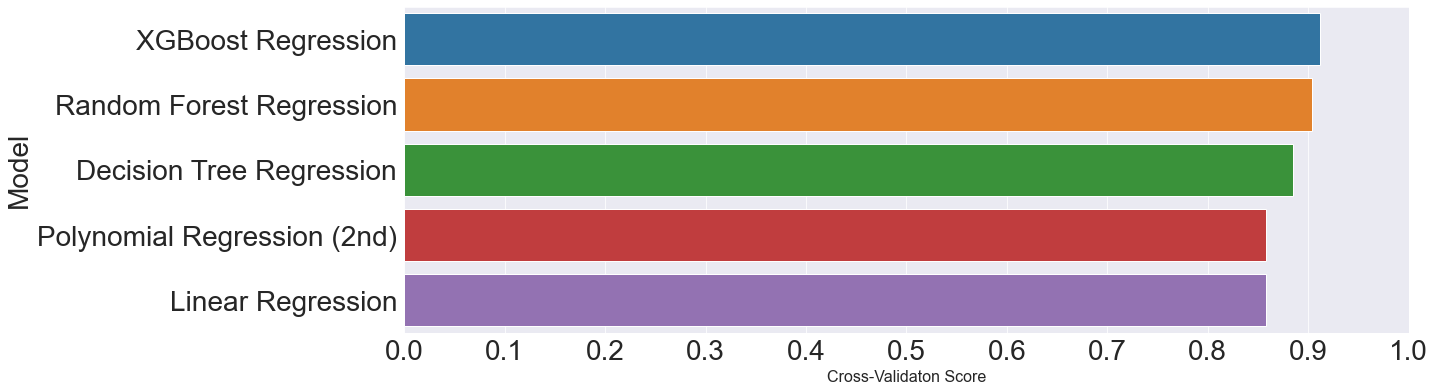

In [72]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))

plt.rcParams.update({'font.size': 23})

plt.show()

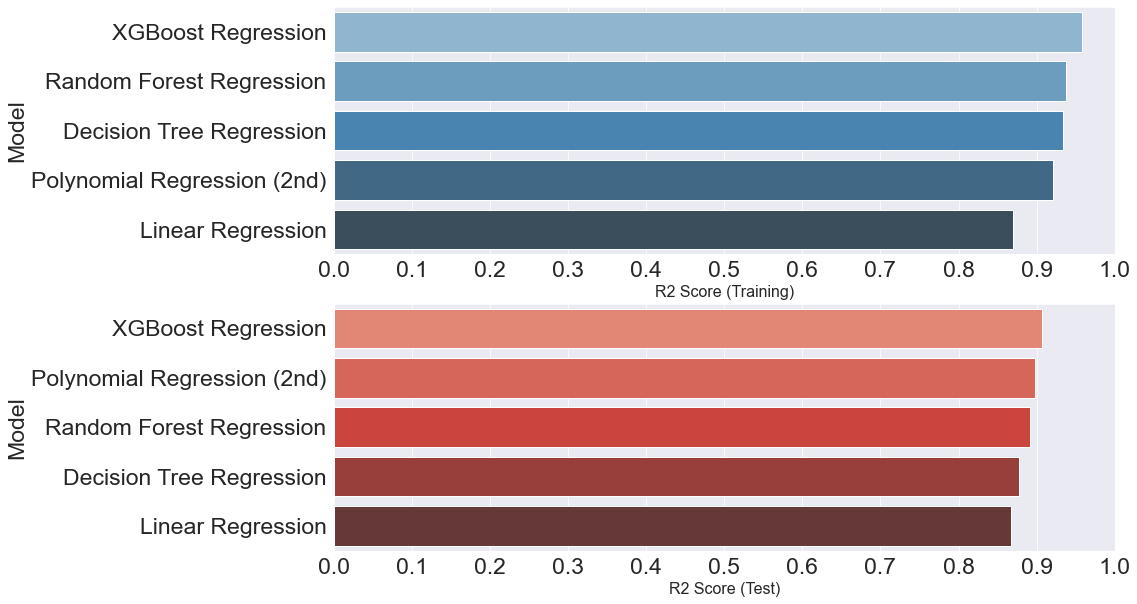

In [73]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

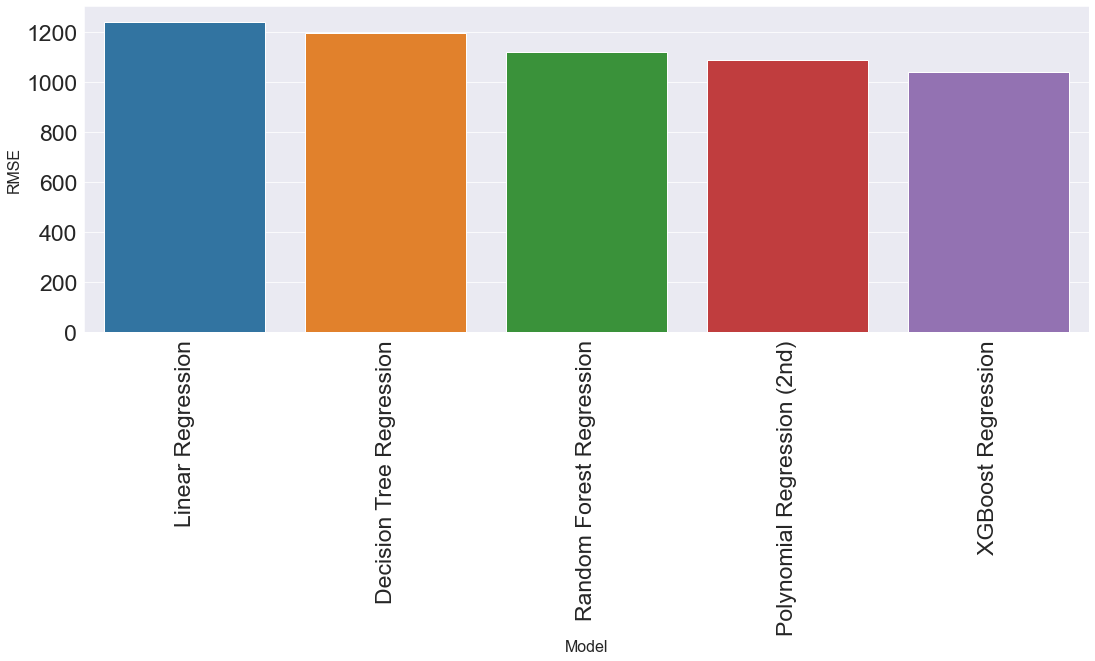

In [78]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.xticks(rotation=90)

plt.show()

# XGBoost outperformed all other models in every evaluations.